In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [3]:
path = 'flats.csv'
data_raw=pd.read_csv(path)


In [4]:
data_raw.shape

(72379, 10)

In [5]:
data_raw.head()

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
0,3500.0,240,56.365696,43.820250,Resale,9.0,Brick,3.0,4.0,60.0
1,4000.0,240,56.323057,44.007862,Resale,3.0,Brick,3.0,3.0,57.0
2,2150.0,240,56.267552,43.892107,Resale,5.0,Panel,2.0,1.0,38.0
3,3100.0,240,56.359963,43.813756,Resale,5.0,Panel,4.0,2.0,59.0
4,3585.0,240,56.325374,43.937463,Resale,9.0,Panel,2.0,7.0,52.5


In [6]:
data_raw.tail()

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
72374,3250.000,372,56.282006,44.085056,Resale,14.0,Monolithic,1.0,1.0,44.7
72375,2824.800,371,56.348480,43.873340,Resale,17.0,Brick,1.0,3.0,42.8
72376,3316.125,371,56.300964,43.951468,New,25.0,Monolithic,2.0,5.0,55.5
72377,13600.000,371,56.329327,44.014997,Resale,5.0,Brick,3.0,4.0,81.9
72378,1490.000,372,56.323293,43.868697,Resale,2.0,Brick,2.0,2.0,46.0


In [7]:
data_raw.columns

Index(['Price', 'Date', 'Lat', 'Lng', 'Type', 'Floors', 'Building', 'Rooms',
       'Floor', 'Area'],
      dtype='object')

In [8]:
data_raw.index

RangeIndex(start=0, stop=72379, step=1)

In [9]:
data_raw['Building'].dtype

dtype('O')

In [10]:
data_raw['Building']=data_raw['Building'].astype('category')

In [11]:
data_raw['Building'].dtype

CategoricalDtype(categories=['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden'], ordered=False)

In [12]:
data_raw['Type'] =data_raw['Type'].astype('category')

In [13]:
data_raw['Type'].dtype

CategoricalDtype(categories=['New', 'Resale'], ordered=False)

In [14]:
data_raw.at[2,'Building']

'Panel'

In [15]:
data_raw.loc[2,'Building']

'Panel'

In [16]:
data_raw.iat[2,6]

'Panel'

In [17]:
data_raw.iloc[2,6]

'Panel'

In [18]:
data_raw.loc[[2,3,5],['Type','Building','Rooms']]

,Type,Building,Rooms
2,Resale,Panel,2.0
3,Resale,Panel,4.0
5,Resale,Brick,2.0


In [19]:
data_raw.iloc[[2,3,5],[4,6,7]]

,Type,Building,Rooms
2,Resale,Panel,2.0
3,Resale,Panel,4.0
5,Resale,Brick,2.0


In [23]:
data_raw.loc[[2,3,5],['Type','Building','Rooms']].loc[5,'Building']

'Brick'

In [24]:
data_raw.loc[:,['Type','Building']]

,Type,Building
0,Resale,Brick
1,Resale,Brick
2,Resale,Panel
3,Resale,Panel
4,Resale,Panel
...,...,...
72374,Resale,Monolithic
72375,Resale,Brick
72376,New,Monolithic
72377,Resale,Brick


In [26]:
data_raw.loc[[2,5],:]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
2,2150.0,240,56.267552,43.892107,Resale,5.0,Panel,2.0,1.0,38.0
5,2380.0,240,56.368027,43.818317,Resale,9.0,Brick,2.0,7.0,46.0


In [31]:
 data_raw.loc[5]

Price          2380.0
Date              240
Lat         56.368027
Lng         43.818317
Type           Resale
Floors            9.0
Building        Brick
Rooms             2.0
Floor             7.0
Area             46.0
Name: 5, dtype: object

In [32]:
data_raw['Price']

0         3500.000
1         4000.000
2         2150.000
3         3100.000
4         3585.000
           ...    
72374     3250.000
72375     2824.800
72376     3316.125
72377    13600.000
72378     1490.000
Name: Price, Length: 72379, dtype: float64

In [33]:
data_raw.Building

0             Brick
1             Brick
2             Panel
3             Panel
4             Panel
            ...    
72374    Monolithic
72375         Brick
72376    Monolithic
72377         Brick
72378         Brick
Name: Building, Length: 72379, dtype: category
Categories (5, object): ['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden']

In [34]:
data_raw[['Type','Lat']]

,Type,Lat
0,Resale,56.365696
1,Resale,56.323057
2,Resale,56.267552
3,Resale,56.359963
4,Resale,56.325374
...,...,...
72374,Resale,56.282006
72375,Resale,56.348480
72376,New,56.300964
72377,Resale,56.329327


In [36]:
df=data_raw.iloc[:4,4:8]
df

,Type,Floors,Building,Rooms
0,Resale,9.0,Brick,3.0
1,Resale,3.0,Brick,3.0
2,Resale,5.0,Panel,2.0
3,Resale,5.0,Panel,4.0


In [37]:
df.loc[[True,True,False,True],[False,True,True,False]]

,Floors,Building
0,9.0,Brick
1,3.0,Brick
3,5.0,Panel


In [41]:
df.loc[[True,True,False,True]]

,Type,Floors,Building,Rooms
0,Resale,9.0,Brick,3.0
1,Resale,3.0,Brick,3.0
3,Resale,5.0,Panel,4.0


In [42]:
df[[True,True,False,True]]

,Type,Floors,Building,Rooms
0,Resale,9.0,Brick,3.0
1,Resale,3.0,Brick,3.0
3,Resale,5.0,Panel,4.0


In [45]:
df.loc[df.Floors>3]

,Type,Floors,Building,Rooms
0,Resale,9.0,Brick,3.0
2,Resale,5.0,Panel,2.0
3,Resale,5.0,Panel,4.0


In [46]:
df[[True,True,False,True]].loc[df.Floors>3] 

,Type,Floors,Building,Rooms
0,Resale,9.0,Brick,3.0
3,Resale,5.0,Panel,4.0


# 2

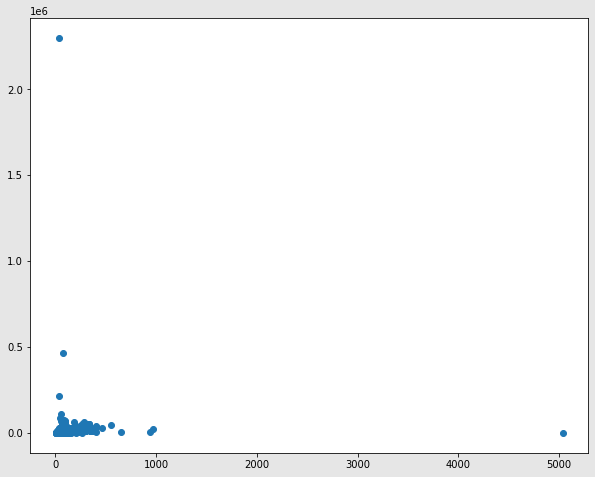

In [66]:
plt.figure(figsize=(10,8),facecolor=(0.9,0.9,0.9))

plt.scatter(data_raw['Area'],data_raw['Price'])
pass

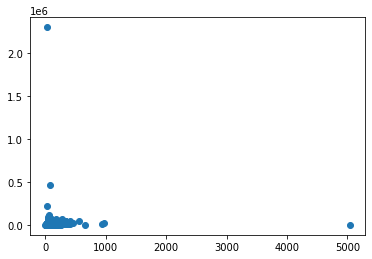

In [67]:
plt.scatter(x='Area',y='Price',data=data_raw)
pass

In [68]:
data_raw['Price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      800.0
0.010     1000.0
0.050     1500.0
0.100     1700.0
0.500     2850.0
0.900     5500.0
0.950     7000.0
0.990    12000.0
0.995    14900.0
Name: Price, dtype: float64

In [69]:
data_raw['Area'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     18.0
0.010     19.0
0.050     29.0
0.100     31.0
0.500     46.0
0.900     80.0
0.950     94.0
0.990    150.0
0.995    162.0
Name: Area, dtype: float64

In [76]:
rows_to_drop=data_raw[ 
    (data_raw['Price']<data_raw['Price'].quantile(0.005)) | (data_raw['Price']>data_raw['Price'].quantile(0.995))|
    (data_raw['Area']<data_raw['Area'].quantile(0.005)) | (data_raw['Area']> data_raw['Area'].quantile(0.995))].index
rows_to_drop

Int64Index([    6,    34,    41,   215,   222,   274,   338,   366,   418,
              471,
            ...
            71441, 71551, 71759, 71932, 71993, 72018, 72109, 72128, 72269,
            72311],
           dtype='int64', length=1114)

In [77]:
data=data_raw.drop(rows_to_drop)
data.shape

(71265, 10)

## 3

In [78]:
data.describe()

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
count,71265.000000,71265.000000,71265.000000,71265.000000,71248.000000,71248.000000,71248.000000,71248.000000
mean,3310.907396,264.311120,56.295105,43.935371,9.406425,1.945977,5.188525,52.503329
std,1748.493102,87.897571,0.044836,0.081757,5.131401,0.910165,3.876806,21.402428
min,800.000000,56.000000,54.862751,41.806470,1.000000,0.000000,1.000000,18.000000
25%,2200.000000,190.000000,56.265022,43.868571,5.000000,1.000000,2.000000,37.000000
50%,2850.000000,295.000000,56.300147,43.931804,9.000000,2.000000,4.000000,46.000000
75%,3850.000000,344.000000,56.325320,44.005985,12.000000,3.000000,7.000000,63.000000
max,14900.000000,372.000000,57.127867,44.485489,25.000000,6.000000,25.000000,162.000000


In [79]:
data.describe(include=['category'])

,Type,Building
count,71248,71248
unique,2,5
top,Resale,Brick
freq,63136,52408


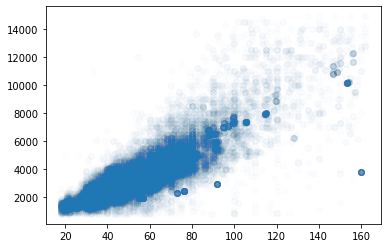

In [81]:
plt.scatter(data['Area'],data['Price'],alpha=0.01)
pass

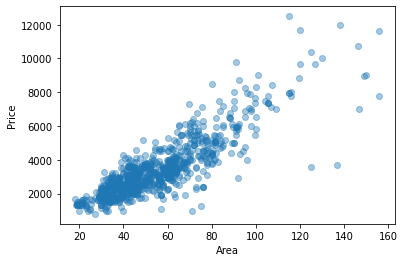

In [84]:
np.random.seed(58)
random_subset=np.random.choice(np.arange(data.shape[0]),size=1000,replace=False)

plt.scatter(data.iloc[random_subset]['Area'],data.iloc[random_subset]['Price'],alpha=0.4)
plt.xlabel('Area')
plt.ylabel('Price')
pass

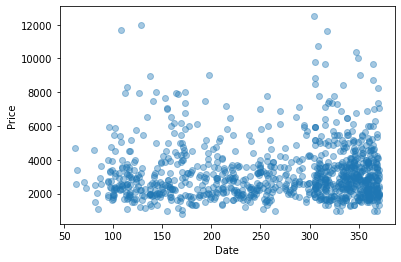

In [85]:
plt.scatter(data.iloc[random_subset]['Date'],data.iloc[random_subset]['Price'],alpha=0.4)
plt.xlabel('Date')
plt.ylabel('Price')
pass

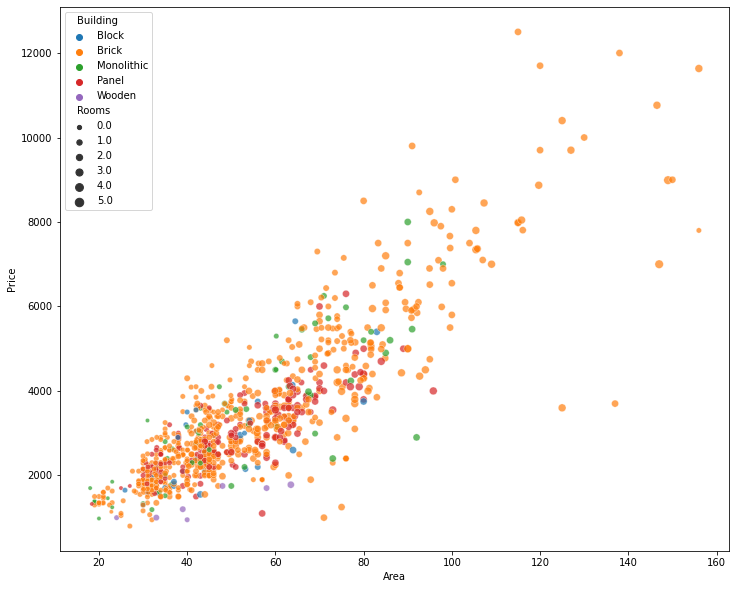

In [103]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Area',y='Price',size='Rooms',hue='Building',data=data.iloc[random_subset],alpha=0.7)
pass

No handles with labels found to put in legend.


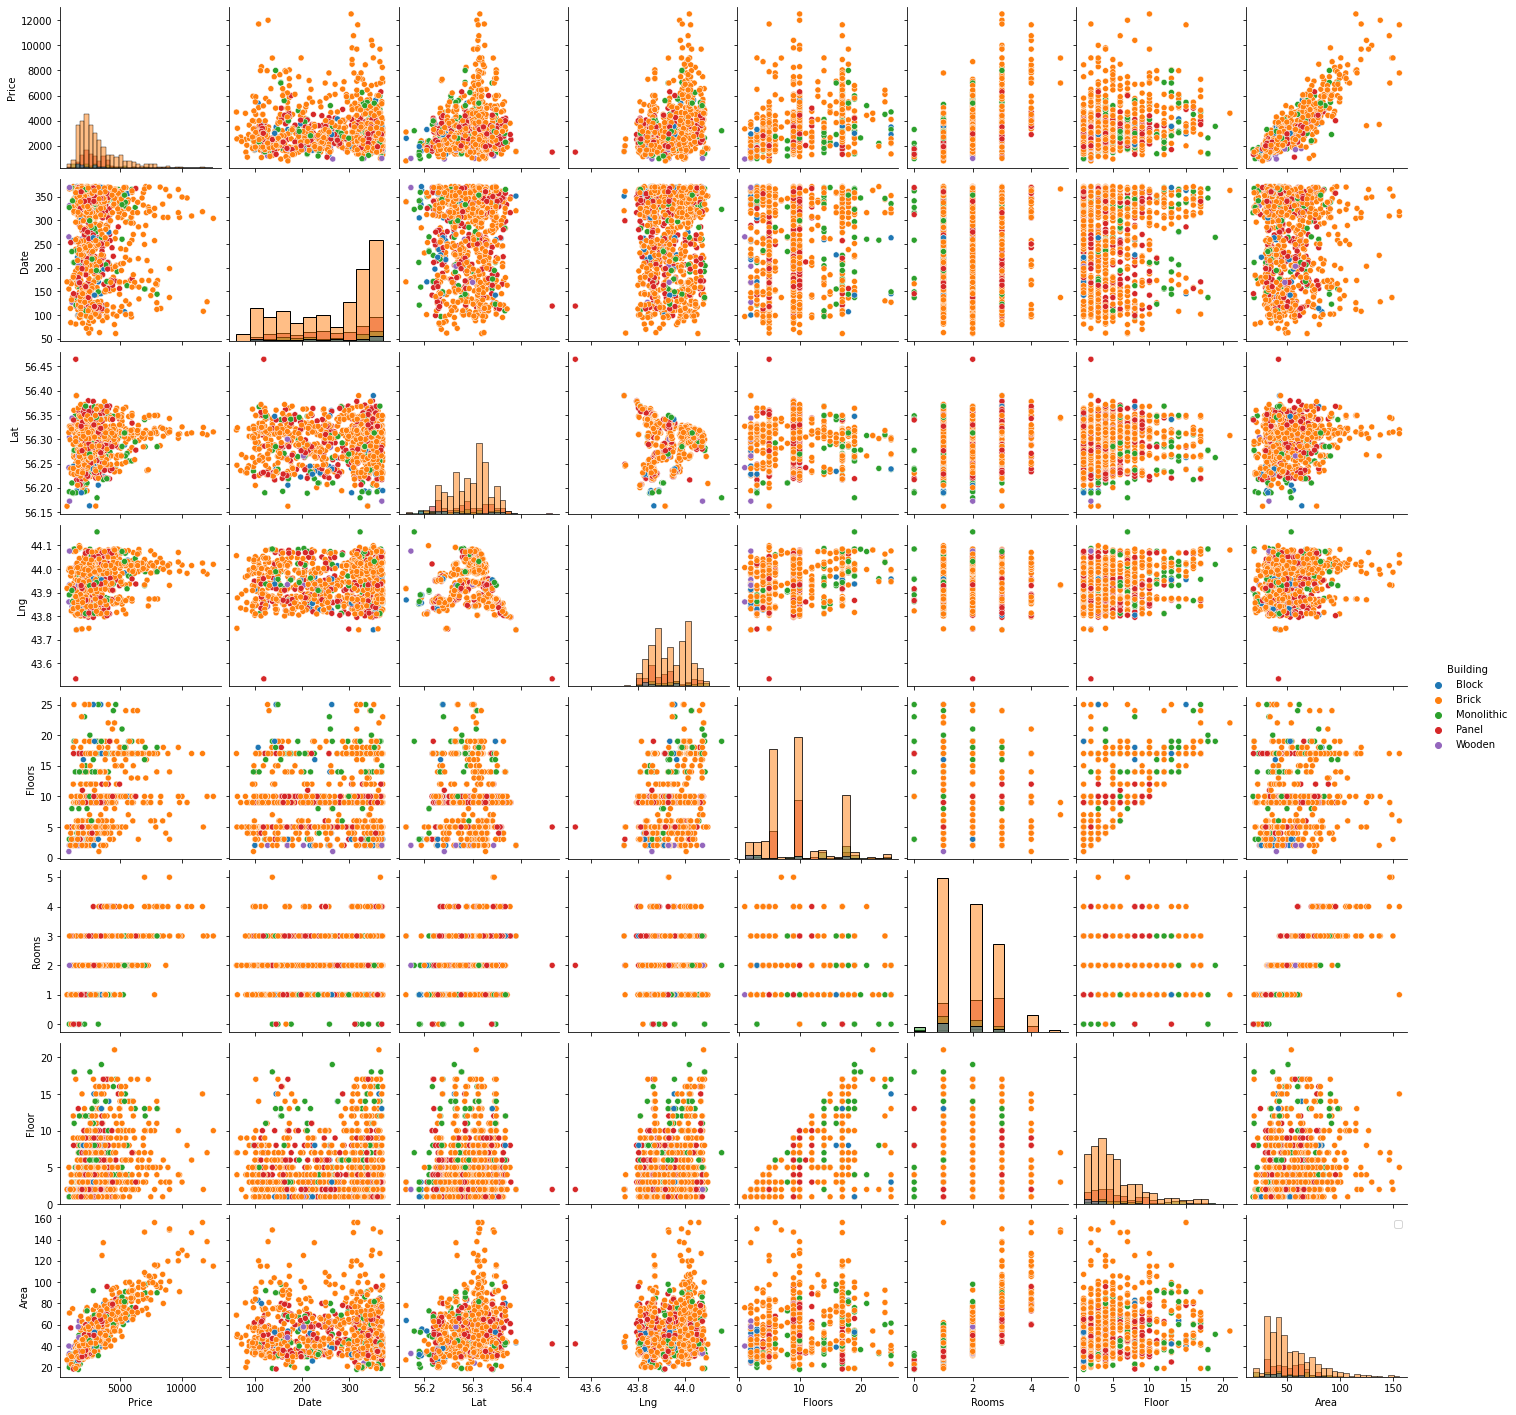

In [104]:
sns.pairplot(data.iloc[random_subset],hue='Building',diag_kind='hist')
plt.legend()
pass

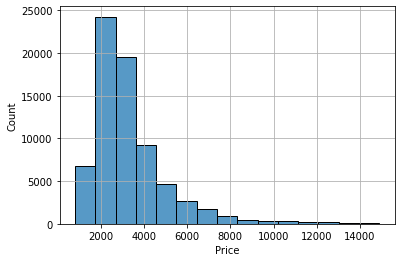

In [107]:
sns.histplot(data.Price,bins=15)
plt.grid()
pass

C:\Users\sosor\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


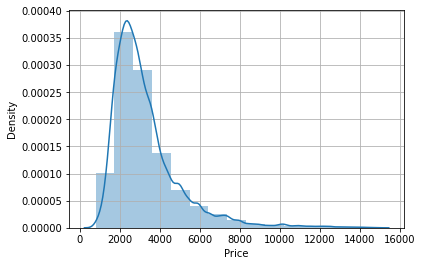

In [109]:
sns.distplot(data.Price,bins=15)
plt.grid()
pass

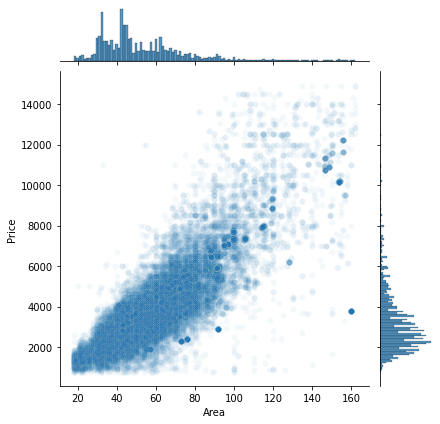

In [111]:
sns.jointplot(x='Area',y='Price',alpha=0.05,data=data)
pass

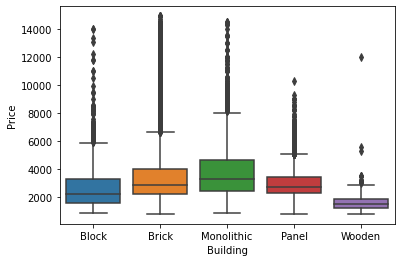

In [112]:
sns.boxplot(x='Building',y='Price',data=data)
pass

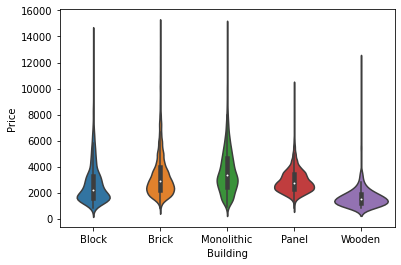

In [114]:
sns.violinplot(x='Building',y='Price',data=data)
pass

In [115]:
corr_mat=data.corr()
corr_mat

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
Price,1.000000,0.033228,0.174728,0.305763,0.359210,0.554399,0.252512,0.852936
Date,0.033228,1.000000,0.010290,-0.002029,0.045034,-0.002045,0.032884,0.013564
Lat,0.174728,0.010290,1.000000,0.017505,0.079252,0.101350,0.048735,0.154772
Lng,0.305763,-0.002029,0.017505,1.000000,0.221267,0.026272,0.150245,0.177080
Floors,0.359210,0.045034,0.079252,0.221267,1.000000,-0.048981,0.641791,0.266499
Rooms,0.554399,-0.002045,0.101350,0.026272,-0.048981,1.000000,-0.022297,0.776492
Floor,0.252512,0.032884,0.048735,0.150245,0.641791,-0.022297,1.000000,0.182830
Area,0.852936,0.013564,0.154772,0.177080,0.266499,0.776492,0.182830,1.000000


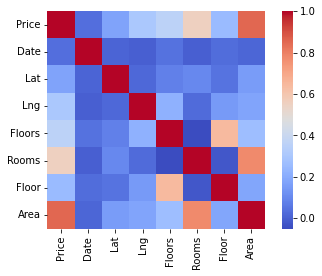

In [117]:
sns.heatmap(corr_mat,square=True,cmap='coolwarm')
pass

In [118]:
corr_mat>0.5

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
Price,True,False,False,False,False,True,False,True
Date,False,True,False,False,False,False,False,False
Lat,False,False,True,False,False,False,False,False
Lng,False,False,False,True,False,False,False,False
Floors,False,False,False,False,True,False,True,False
Rooms,True,False,False,False,False,True,False,True
Floor,False,False,False,False,True,False,True,False
Area,True,False,False,False,False,True,False,True


In [119]:
np.triu(corr_mat>0.5)

array([[ True, False, False, False, False,  True, False,  True],
       [False,  True, False, False, False, False, False, False],
       [False, False,  True, False, False, False, False, False],
       [False, False, False,  True, False, False, False, False],
       [False, False, False, False,  True, False,  True, False],
       [False, False, False, False, False,  True, False,  True],
       [False, False, False, False, False, False,  True, False],
       [False, False, False, False, False, False, False,  True]])

In [121]:
np.triu(corr_mat>0.5,k=1)

array([[False, False, False, False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True, False],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

In [122]:
corr_mat.where(np.triu(corr_mat>0.5,k=1))

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
Price,NaN,NaN,NaN,NaN,NaN,0.554399,NaN,0.852936
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Floors,NaN,NaN,NaN,NaN,NaN,NaN,0.641791,NaN
Rooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.776492
Floor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
corr_mat.where(np.triu(corr_mat>0.5,k=1)).stack()

Price   Rooms    0.554399
        Area     0.852936
Floors  Floor    0.641791
Rooms   Area     0.776492
dtype: float64

In [124]:
corr_mat.where(np.triu(corr_mat>0.5,k=1)).stack().sort_values(ascending=False)

Price   Area     0.852936
Rooms   Area     0.776492
Floors  Floor    0.641791
Price   Rooms    0.554399
dtype: float64

In [125]:
corr_mat.loc['Price','Lng'],corr_mat.loc['Price','Lat']

(0.30576270805695593, 0.17472831974282396)

In [126]:
corr_mat.loc['Price', 'Date']

0.0332282805637263

In [127]:
data.loc[(data['Building']=='Wooden')&(data['Price']>=3000)]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
5396,5300.0,354,56.321805,44.004172,Resale,2.0,Wooden,5.0,2.0,103.0
7645,3500.0,221,56.205918,43.799766,Resale,2.0,Wooden,2.0,1.0,110.0
8548,3120.0,145,56.313518,44.008223,Resale,2.0,Wooden,3.0,1.0,70.0
12762,3100.0,310,56.323503,44.024052,Resale,2.0,Wooden,3.0,1.0,72.0
20220,3000.0,365,56.326333,44.021428,Resale,2.0,Wooden,2.0,1.0,53.0
23092,3200.0,181,56.266806,44.061916,Resale,3.0,Wooden,1.0,2.0,83.0
41743,5600.0,342,56.315061,43.988227,Resale,2.0,Wooden,4.0,2.0,103.0
47589,3200.0,316,56.312075,44.039224,Resale,1.0,Wooden,2.0,1.0,52.0
54033,3500.0,312,56.323343,44.019398,Resale,2.0,Wooden,2.0,1.0,47.0
58941,3500.0,369,56.306727,43.992027,Resale,1.0,Wooden,2.0,1.0,40.0


In [128]:
data.loc[(data['Building']=='Wooden') & (data['Type']=='New'), :]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area


In [129]:
data['Type'].unique()

['Resale', 'New', NaN]
Categories (2, object): ['New', 'Resale']

In [130]:
data['Building'].unique()

['Brick', 'Panel', 'Block', 'Monolithic', 'Wooden', NaN]
Categories (5, object): ['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden']

In [131]:
data['Type'].value_counts()

Resale    63136
New        8112
Name: Type, dtype: int64

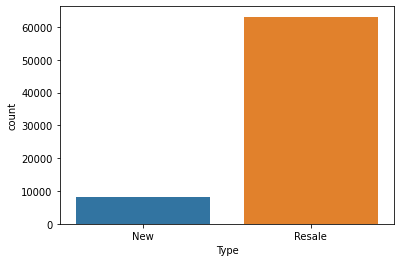

In [133]:
sns.countplot(x='Type',data=data)
pass

In [134]:
data['Building'].value_counts() 

Brick         52408
Panel         12170
Monolithic     4482
Block          1911
Wooden          277
Name: Building, dtype: int64

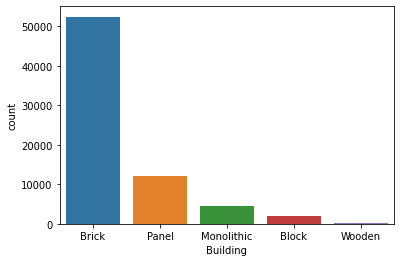

In [135]:
sns.countplot(x='Building', order=data['Building'].value_counts().index, data=data)
pass

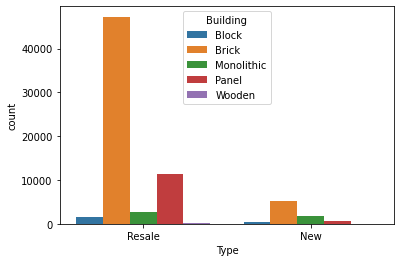

In [139]:
sns.countplot(x='Type', order=data['Type'].value_counts().index, hue='Building', data=data)
pass

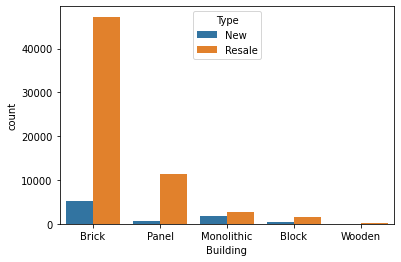

In [140]:
sns.countplot(x='Building', order=data['Building'].value_counts().index, hue='Type', data=data)
pass

## 4

In [142]:
data.isna().sum()

Price        0
Date         0
Lat          0
Lng          0
Type        17
Floors      17
Building    17
Rooms       17
Floor       17
Area        17
dtype: int64